<a href="https://colab.research.google.com/github/MarkNCI/AI-Ml-Diploma/blob/main/MHayden_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Description
I am using dataset from [Kaggle](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease), which is an annual telephone survey conducted by the United States Center for Disease Control in 2020 with over 400,000 participents.

## Column Descriptions

```
HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI).
BMI: Body Mass Index (BMI).
Smoking: Have you smoked at least 100 cigarettes in your entire life?
AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
Stroke: (Ever told) (you had) a stroke?
PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days).
MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days).
DiffWalking: Do you have serious difficulty walking or climbing stairs?
Sex: Are you male or female?
AgeCategory: Fourteen-level age category. (then calculated the mean)
Race: Imputed race/ethnicity value.
Diabetic: (Ever told) (you had) diabetes?
PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job.
GenHealth: Would you say that in general your health is...
SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
Asthma: (Ever told) (you had) asthma?
KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
SkinCancer: (Ever told) (you had) skin cancer?

```



In [1]:
# Load Libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Upload Cancer Patients dataset (Goodle Colab) ##
uploaded = files.upload()

Saving heart_2020_cleaned.csv to heart_2020_cleaned.csv


In [18]:
# Load dataset
df = pd.read_csv('/content/heart_2020_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [23]:
print(df.columns,'\n')
df.head()

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object') 



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [24]:
# Count nulls
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

# Dataset Details

In [50]:
names = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

for name in names:
  print(name)
  print(np.unique(df[name].values))

HeartDisease
['No' 'Yes']
Smoking
['No' 'Yes']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
Race
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
Diabetic
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
PhysicalActivity
['No' 'Yes']
GenHealth
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
Asthma
['No' 'Yes']
KidneyDisease
['No' 'Yes']
SkinCancer
['No' 'Yes']


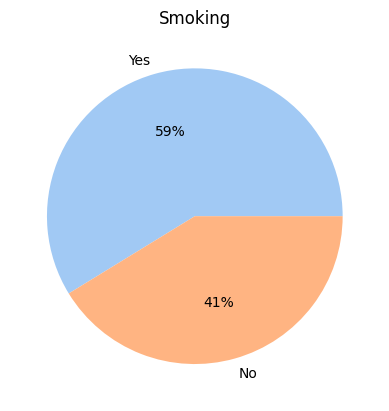

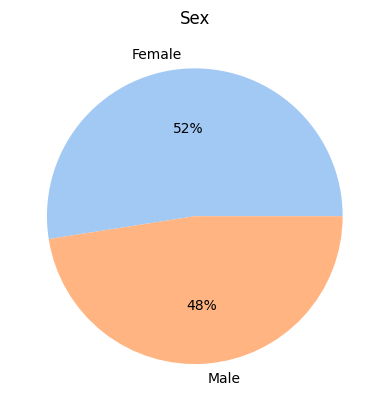

In [26]:
# Stats per column
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Smoking'].value_counts(),labels = df['Smoking'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Smoking')
plt.show()

colors = sns.color_palette('pastel')[0:5]
plt.pie(df['Sex'].value_counts(),labels = df['Sex'].unique(), colors = colors, autopct='%.0f%%')
plt.title('Sex')
plt.show()

# Feature Extraction



```
TODO:
1) AgeCategory --> Mean value + any other cols like this?
2) Split the data between categorical and non-categorical
3) Feature selection: What do I use?
4) Features with multiple values --> 1 hot encoding?
```

